<center> <h1>Podatkovno rudarjenje (PR)</h1>
    <br>
    <br>
<h3>Univerza v Ljubljani</h3>
<h3>Fakulteta za računalništvo in informatiko</h3>

##### Skupina:
 - Žiga Šolar	(zs3653@student.uni-lj.si)
 - Andraž Simčič (as7495@student.uni-lj.si)
 - Simon Klemenčič
 - Nejc Kozjek
 

##### Kratek opis naloge:

Namen naše naloge je analiza razvoja športnikov in športov na osnovi podatkov z Olimpijskih iger od leta 1896 v Atenah do leta 2016 v Riu (120 let).
Olimpijske igre so športni dogodek, ki se odvija vsako četro leto. Poznamo zimske in letne Olimpijske igre. Popularne so zaradi raznolike ponudbe zimskih in letnih športov, kot so smučanje, plavanje, košarka, nogomet, itd.

##### Cilji:

Iz podatkov bomo poskusili izluščiti naslednje informacije:
 - primerjava telesnih karakteristik med različnimi športi
 - primerjava telesnih karakteristik uspešnejših športnikov/ekip
 - primerjava telesnih karakteristik istih športov skozi čas
 - napoved uspešnosti športnika glede na njegove telesne karakteristike
 - starostna porazdelitev športnikov med različnimi športi
 - uspešnost držav na Olimpijskih igrah
 - analiza Slovenije na Olimpijskih igrah (kje smo uspešni, zakaj?)

##### Vir in oblika podatkov:
 
Podatkovno zbirko bomo pridobili iz spletnega portala Kaggle (https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/version/2?) kjer so podatki na razpolago v formatu "csv".

### Uvoz knjižnic in podatkov

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

raw_data = pd.read_csv("Data/athlete_events.csv")
raw_regions = pd.read_csv("Data/noc_regions.csv")

### Priprava podatkov

Podatke dobimo razdeljene v dveh ".csv" datotekah. Podatke združimo v eno tabelo, za bolj pregleden pogled držav iz katerih prihajajo športniki.

In [2]:
all_raw_data = pd.merge(raw_data, raw_regions, on="NOC")
all_raw_data.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN
6,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,NaN,China,NaN
7,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,China,NaN
8,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,China,NaN
9,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",NaN,China,NaN


### Osnovna analiza

Prikaz povprečnih starosti športnikov glede na šport.

In [3]:
starost_sport = all_raw_data[["Sport","Age"]]
starost_sport = starost_sport.groupby("Sport")["Age"].mean().reset_index()
starost_sport["Age"] = starost_sport["Age"].round(2)
starost_sport  = starost_sport.sort_values(by="Age", ascending=False)

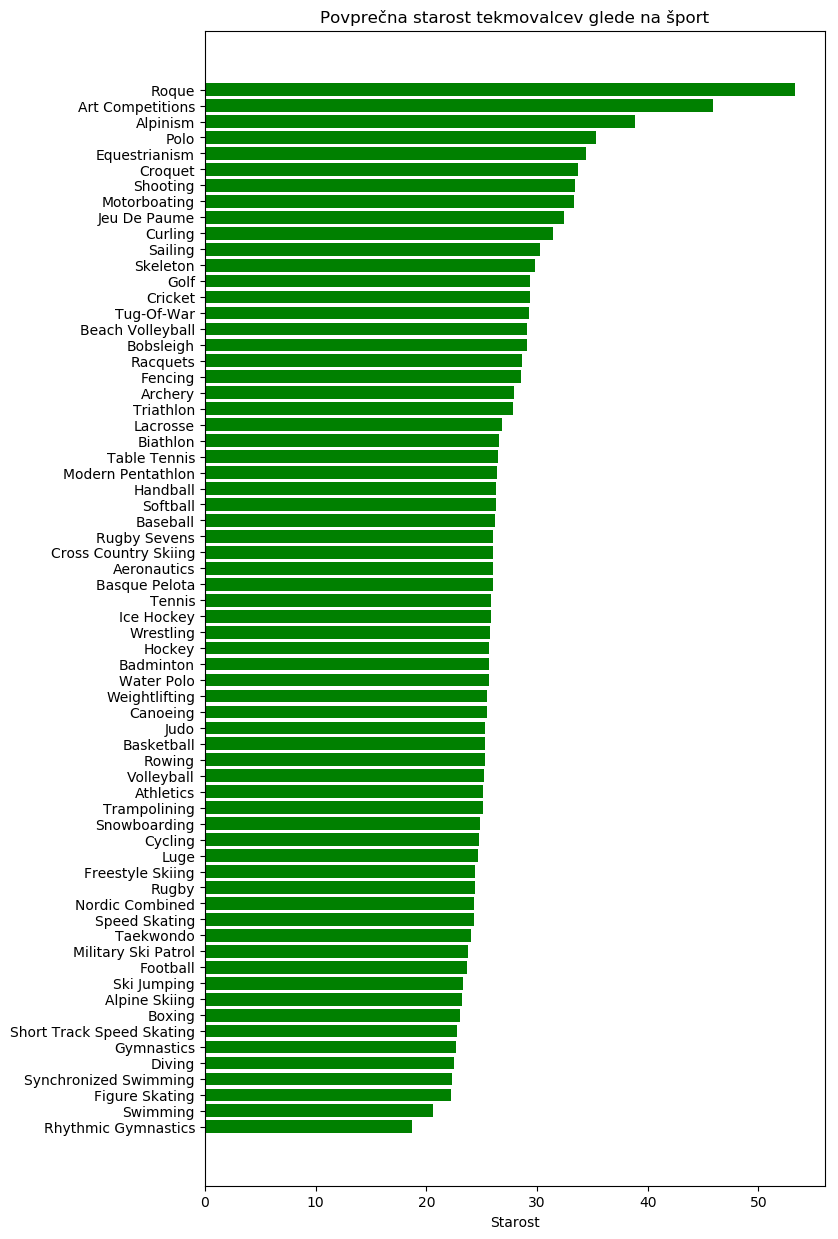

In [4]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 15))

sporti = np.arange(len(starost_sport["Sport"]))

#nastavi znacilnosti grafa
ax.barh(sporti, starost_sport["Age"],height=0.8, align="center", color="green")

#nastavi Y os
ax.set_yticks(sporti)
ax.set_yticklabels(starost_sport["Sport"])
ax.invert_yaxis()

#nastavi naslove
ax.set_xlabel("Starost")
ax.set_title("Povprečna starost tekmovalcev glede na šport")

plt.show()

Prikaz povprečnih višin športnikov glede na šport.

In [5]:
visina_sport = all_raw_data[["Sport","Height"]]
visina_sport = visina_sport.groupby("Sport")["Height"].mean().reset_index()
visina_sport["Height"] = visina_sport["Height"].round(2)
visina_sport  = visina_sport.sort_values(by="Height", ascending=False)

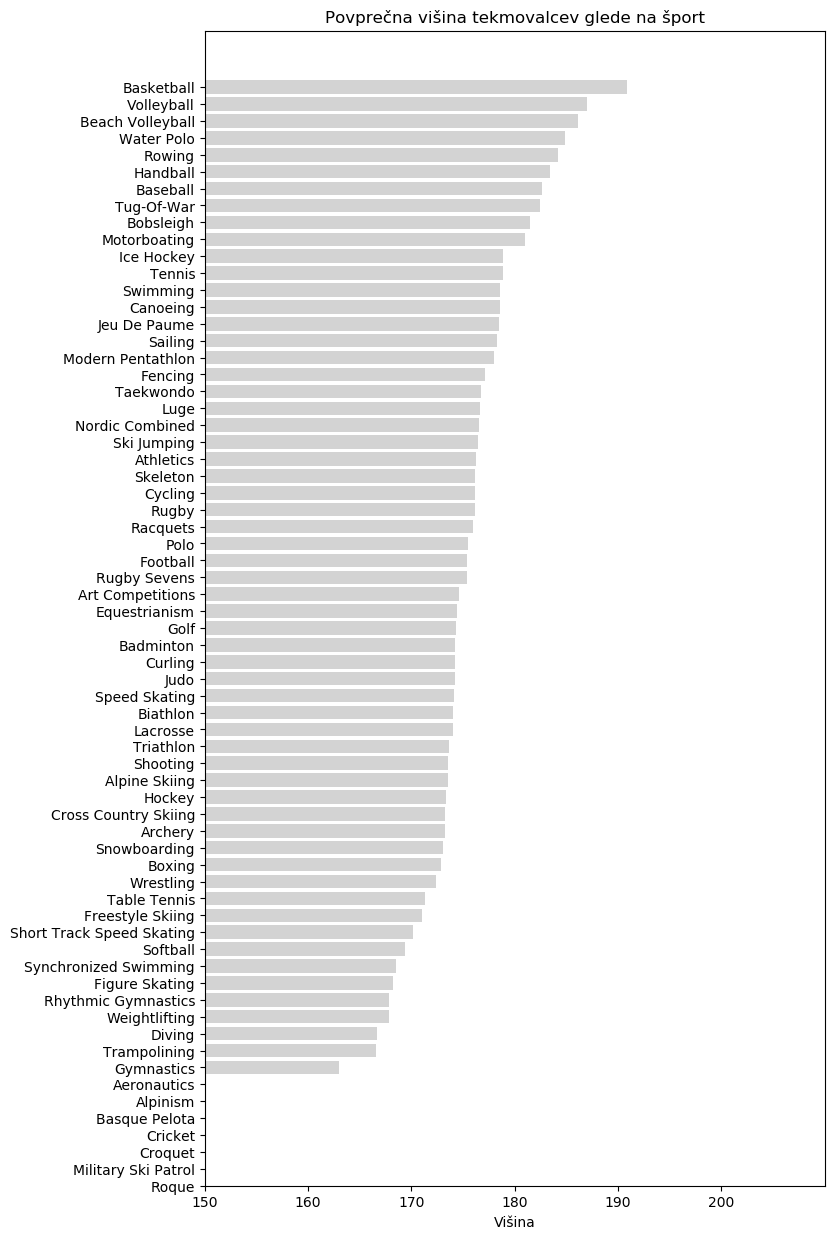

In [6]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 15))

sporti = np.arange(len(visina_sport["Sport"]))
xOS = np.arange(150,210,step=10)

#nastavi znacilnosti grafa
ax.barh(sporti, visina_sport["Height"],height=0.8, align="center", color="lightgrey")

#nastavi Y os
ax.set_yticks(sporti)
ax.set_yticklabels(visina_sport["Sport"])
ax.invert_yaxis()

#nastavi X os
#ax.set_xticks(xOS)
ax.set_xlim((150, 210))
ax.set_xticks(xOS,False)

#nastavi naslove
ax.set_xlabel("Višina")
ax.set_title("Povprečna višina tekmovalcev glede na šport")

plt.show()

Prikaz povprečne teže igralcev glede na šport.

In [7]:
teza_sport = all_raw_data[["Sport","Weight"]]
teza_sport = teza_sport.groupby("Sport")["Weight"].mean().reset_index()
teza_sport["Weight"] = teza_sport["Weight"].round(2)
teza_sport  = teza_sport.sort_values(by="Weight", ascending=False)

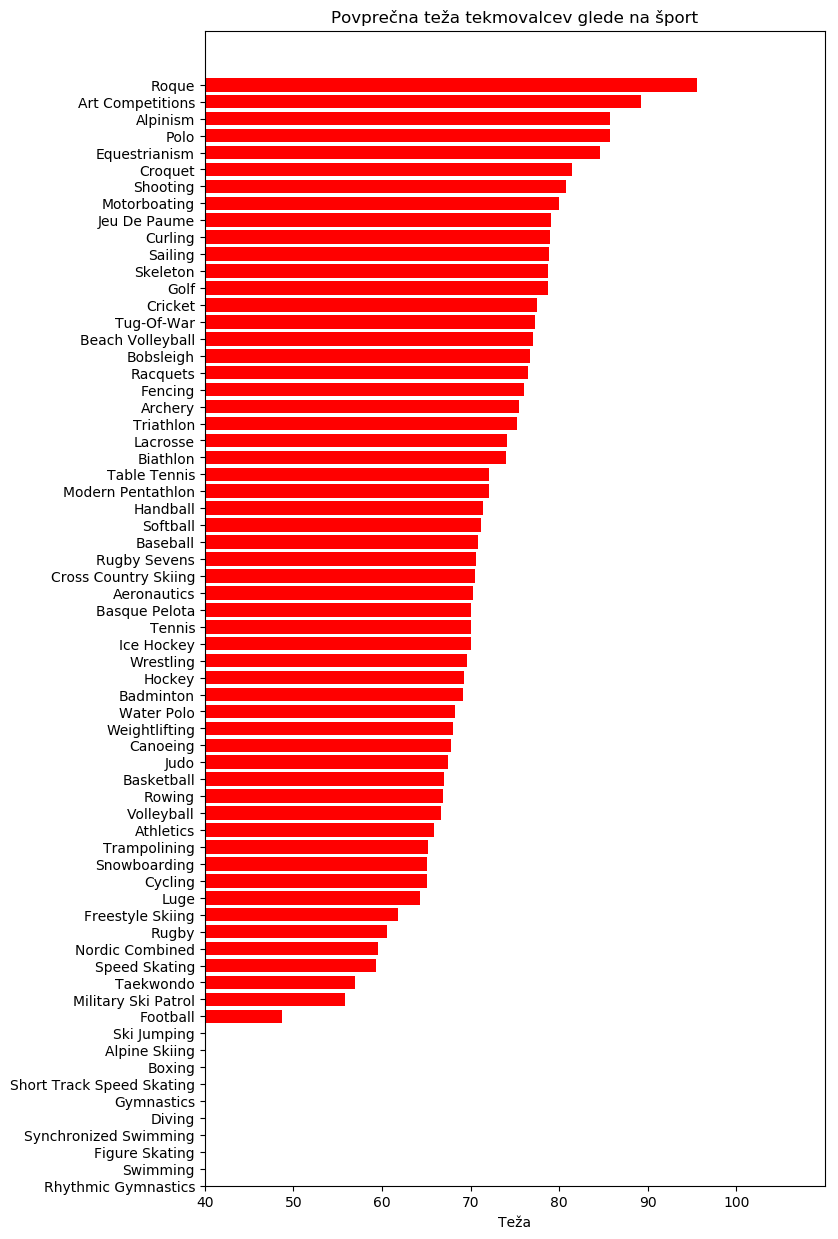

In [8]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 15))

sporti = np.arange(len(teza_sport["Sport"]))
xOS = np.arange(40,101,step=10)

#nastavi znacilnosti grafa
ax.barh(sporti, teza_sport["Weight"],height=0.8, align="center", color="red")

#nastavi Y os
ax.set_yticks(sporti)
ax.set_yticklabels(starost_sport["Sport"])
ax.invert_yaxis()

#nastavi X os
ax.set_xlim((40, 110))
ax.set_xticks(xOS,False)

#nastavi naslove
ax.set_xlabel("Teža")
ax.set_title("Povprečna teža tekmovalcev glede na šport")

plt.show()

### Napovedovanje uspešnosti športnika